In [245]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

User Tables

In [246]:
users= pd.read_excel('user_purchase_data.xlsx', sheet_name='user_registration')
users.head(15)

,userID,is_subscriber
0,1,No
1,2,No
2,3,No
3,4,No
4,5,No
5,6,No
6,7,No
7,8,No
8,9,No
9,10,No


In [247]:
users.shape
users.isna().sum()

userID           0
is_subscriber    0
dtype: int64

In [248]:
users['userID'].nunique()==users.shape[0]

True

<AxesSubplot:>

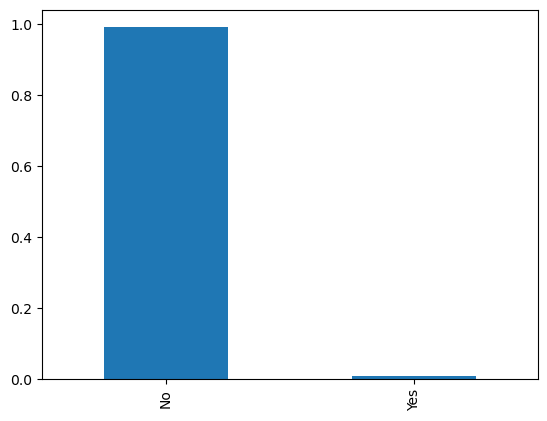

In [249]:
users['is_subscriber'].value_counts(dropna=False,normalize=True).plot(kind="bar")

Mobile Orders

In [250]:
mobile= pd.read_excel('user_purchase_data.xlsx', sheet_name='mobile_orders')
mobile.head()


,user_id,mobile_orders
0,2,5
1,4,2
2,5,5
3,6,31
4,7,10


In [251]:
mobile.shape

(141690, 2)

In [252]:
mobile.isna().sum()

user_id          0
mobile_orders    0
dtype: int64

In [253]:
mobile['user_id'].nunique()==mobile.shape[0]

True

In [254]:
mobile['mobile_orders'].describe()

count    141690.000000
mean          9.565947
std          24.138480
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max        1174.000000
Name: mobile_orders, dtype: float64

<AxesSubplot:ylabel='Frequency'>

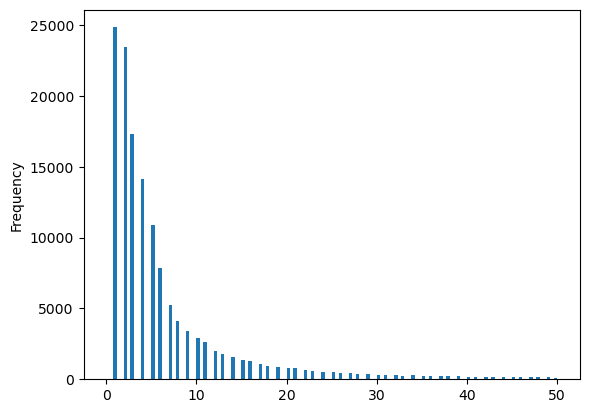

In [255]:
mobile['mobile_orders'].plot(kind='hist', bins=130,range=[0,50])

In [256]:
mobile.loc[~mobile['user_id'].isin(users['userID']),'user_id'].tolist()

[201218,
 201219,
 201220,
 201221,
 201222,
 201223,
 201224,
 201225,
 201226,
 201227,
 201228,
 201229,
 201230,
 201231,
 201232,
 201233,
 201234,
 201235,
 201236,
 201237,
 201238,
 201239,
 201240,
 201241,
 201242,
 201243,
 201244,
 201245,
 201246,
 201247,
 201248,
 201249,
 201250,
 201251,
 201252,
 201253,
 201254,
 201255,
 201256,
 201257,
 201258,
 201259,
 201260,
 201261,
 201262,
 201263,
 201264,
 201265,
 201266,
 201267,
 201268,
 201269,
 201270,
 201271,
 201272,
 201273,
 201274,
 201275,
 201276,
 201277,
 201278,
 201279,
 201280,
 201281,
 201282,
 201283,
 201284,
 201285,
 201286,
 201287,
 201288,
 201289,
 201290,
 201291,
 201292,
 201293,
 201294,
 201295,
 201296,
 201297,
 201298,
 201299,
 201300,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 201311,
 201312,
 201313,
 201314,
 201315,
 201316,
 201317,
 201318,
 201319,
 201320,
 201321,
 201322,
 201323,
 201324,
 201325,
 201326,
 201327,
 201328,
 

In-store Orders

In [257]:
in_store= pd.read_excel('user_purchase_data.xlsx', sheet_name='in_store_orders')
in_store.head()

,user_id,in_store_orders
0,5,26
1,6,1
2,26,5
3,27,11
4,31,2


In [258]:
in_store.shape

(53287, 2)

In [259]:
in_store.isna().sum()

user_id            0
in_store_orders    0
dtype: int64

In [260]:
in_store['user_id'].nunique()==in_store.shape[0]

True

In [261]:
in_store['in_store_orders'].describe()

count    53287.000000
mean        23.849701
std         55.010021
min          1.000000
25%          3.000000
50%          9.000000
75%         24.000000
max       1419.000000
Name: in_store_orders, dtype: float64

<AxesSubplot:ylabel='Frequency'>

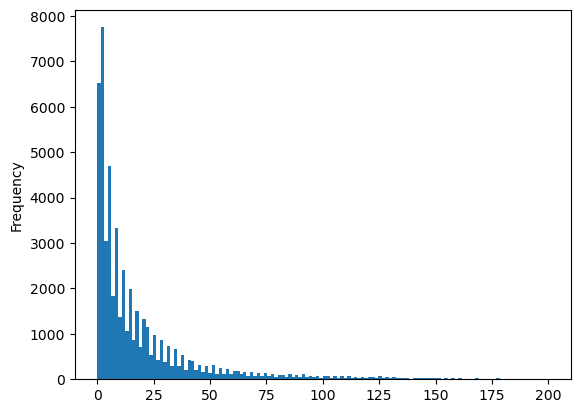

In [262]:
in_store['in_store_orders'].plot(kind='hist',bins=130,range=[0,200])

In [263]:
in_store.loc[~in_store['user_id'].isin(users['userID']),'user_id'].tolist()

[203045,
 201220,
 203046,
 203047,
 203048,
 201222,
 201223,
 201225,
 201226,
 203049,
 203050,
 203051,
 201231,
 201232,
 201233,
 203052,
 203053,
 201234,
 201235,
 203054,
 203055,
 203056,
 201245,
 203057,
 201250,
 203058,
 203059,
 203060,
 203061,
 203062,
 203063,
 203064,
 201259,
 203065,
 203066,
 203067,
 203068,
 203069,
 203070,
 201264,
 203071,
 203072,
 201267,
 203073,
 203074,
 201269,
 201270,
 201272,
 203075,
 203076,
 203077,
 203078,
 203079,
 201280,
 203080,
 203081,
 203082,
 201282,
 201283,
 203083,
 203084,
 203085,
 201287,
 203086,
 201288,
 203087,
 203088,
 203089,
 203090,
 203091,
 203092,
 203093,
 203094,
 201294,
 203095,
 203096,
 203097,
 203098,
 201299,
 201300,
 201302,
 203099,
 201304,
 203100,
 203101,
 203102,
 203103,
 201309,
 203104,
 201312,
 203105,
 201318,
 203106,
 203107,
 203108,
 203109,
 203110,
 203111,
 203112,
 203113,
 201327,
 203114,
 201329,
 203115,
 203116,
 203117,
 203118,
 203119,
 203120,
 201338,
 203121,
 

Data Manipulation

In [264]:
users.rename(columns={'userID':'user_id'},inplace=True)
users

,user_id,is_subscriber
0,1,No
1,2,No
2,3,No
3,4,No
4,5,No
...,...,...
201212,201213,No
201213,201214,No
201214,201215,No
201215,201216,No


In [265]:
users['user_category']=['Premium' if i=='Yes' else 'Free' for i in users['is_subscriber'].values]
users

,user_id,is_subscriber,user_category
0,1,No,Free
1,2,No,Free
2,3,No,Free
3,4,No,Free
4,5,No,Free
...,...,...,...
201212,201213,No,Free
201213,201214,No,Free
201214,201215,No,Free
201215,201216,No,Free


In [266]:
users.drop(columns='is_subscriber', inplace=True)
users

,user_id,user_category
0,1,Free
1,2,Free
2,3,Free
3,4,Free
4,5,Free
...,...,...
201212,201213,Free
201213,201214,Free
201214,201215,Free
201215,201216,Free


In [267]:
orders=pd.merge(users,mobile,how='left',on='user_id').merge(in_store,how='left',on='user_id')
orders

,user_id,user_category,mobile_orders,in_store_orders
0,1,Free,NaN,NaN
1,2,Free,5.0,NaN
2,3,Free,NaN,NaN
3,4,Free,2.0,NaN
4,5,Free,5.0,26.0
...,...,...,...,...
201212,201213,Free,2.0,NaN
201213,201214,Free,NaN,NaN
201214,201215,Free,5.0,2.0
201215,201216,Free,2.0,NaN


In [268]:
orders.isna().sum()

user_id                 0
user_category           0
mobile_orders       61354
in_store_orders    149484
dtype: int64

In [269]:
for col in orders.columns[2:]:
    orders[col]=orders[col].fillna(0)
orders

,user_id,user_category,mobile_orders,in_store_orders
0,1,Free,0.0,0.0
1,2,Free,5.0,0.0
2,3,Free,0.0,0.0
3,4,Free,2.0,0.0
4,5,Free,5.0,26.0
...,...,...,...,...
201212,201213,Free,2.0,0.0
201213,201214,Free,0.0,0.0
201214,201215,Free,5.0,2.0
201215,201216,Free,2.0,0.0


In [270]:
orders['total_orders']=orders['mobile_orders']+ orders['in_store_orders']
orders['total_orders']=orders['total_orders'].astype(int)
orders

,user_id,user_category,mobile_orders,in_store_orders,total_orders
0,1,Free,0.0,0.0,0
1,2,Free,5.0,0.0,5
2,3,Free,0.0,0.0,0
3,4,Free,2.0,0.0,2
4,5,Free,5.0,26.0,31
...,...,...,...,...,...
201212,201213,Free,2.0,0.0,2
201213,201214,Free,0.0,0.0,0
201214,201215,Free,5.0,2.0,7
201215,201216,Free,2.0,0.0,2


In [271]:
orders.drop(columns=['mobile_orders','in_store_orders'], inplace=True)

In [272]:
orders.total_orders.describe()

count    201217.000000
mean         12.952131
std          46.347289
min           0.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        2279.000000
Name: total_orders, dtype: float64

In [273]:
cat='Free'
min_orders=1
orders[(orders['user_category']==cat)&(orders['total_orders']>=min_orders)].shape[0]/\
(orders['user_category']=='Free').sum()

0.7516542856141019

^Percentage of orders above a certain value organized by free or premium users

In [274]:
order_bins=[0,1,2,3,4,5,6,7,8,10,12,15,20,25,35,45,50,55,60,70,80,90,100,120,140,160,180,200,
            250,300,350,400,450,500,550,600,700,800,900,1000,1100]

In [275]:
for order_bin in order_bins:
    orders['orders >= '+str(order_bin)]=[1 if i>=order_bin else 0 for i in orders['total_orders'].values]
orders

,user_id,user_category,total_orders,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 10,orders >= 12,orders >= 15,orders >= 20,orders >= 25,orders >= 35,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,1,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Free,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Free,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201212,201213,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201213,201214,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201214,201215,Free,7,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201215,201216,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


^sets binary values for whether the total number of orders is greater than a certain value

In [276]:
totals=orders.drop(columns=['user_id','total_orders'])

In [277]:
totals=totals.groupby('user_category')[totals.columns[1:]].sum().reset_index()
pd.set_option('display.max_columns',None)
totals

,user_category,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 10,orders >= 12,orders >= 15,orders >= 20,orders >= 25,orders >= 35,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,Free,199633,150055,127507,105052,88675,76665,66874,59841,54505,46510,40463,34116,26777,21938,15787,11960,10551,9377,8452,6985,5922,5125,4442,3432,2761,2226,1805,1497,952,668,501,377,296,242,205,165,118,86,73,60,50
1,Premium,1584,1271,1162,1089,1032,972,915,863,804,741,692,635,548,489,410,362,330,317,307,277,257,227,201,171,153,137,113,105,90,73,58,51,45,43,41,37,29,24,19,12,7


In [278]:
graph_df=pd.melt(totals,id_vars='user_category',value_vars=totals.columns[1:],var_name='orders_bin',value_name='registered_users')
graph_df

,user_category,orders_bin,registered_users
0,Free,orders >= 0,199633
1,Premium,orders >= 0,1584
2,Free,orders >= 1,150055
3,Premium,orders >= 1,1271
4,Free,orders >= 2,127507
...,...,...,...
77,Premium,orders >= 900,19
78,Free,orders >= 1000,60
79,Premium,orders >= 1000,12
80,Free,orders >= 1100,50


In [279]:
graph_df['min_orders']=[int(i.split('>= ')[1]) for i in graph_df['orders_bin'].values]
graph_df.drop(columns='orders_bin',inplace=True)
graph_df

,user_category,registered_users,min_orders
0,Free,199633,0
1,Premium,1584,0
2,Free,150055,1
3,Premium,1271,1
4,Free,127507,2
...,...,...,...
77,Premium,19,900
78,Free,60,1000
79,Premium,12,1000
80,Free,50,1100


In [280]:
baseline=0
graph_df['category_totals']=\
[graph_df.loc[(graph_df['user_category']==i)& (graph_df['min_orders']==baseline),'registered_users'].max() \
 for i in graph_df['user_category']]

In [281]:
graph_df

,user_category,registered_users,min_orders,category_totals
0,Free,199633,0,199633
1,Premium,1584,0,1584
2,Free,150055,1,199633
3,Premium,1271,1,1584
4,Free,127507,2,199633
...,...,...,...,...
77,Premium,19,900,1584
78,Free,60,1000,199633
79,Premium,12,1000,1584
80,Free,50,1100,199633


In [282]:
graph_df['%_registered_users']=graph_df['registered_users']/graph_df['category_totals']
graph_df

,user_category,registered_users,min_orders,category_totals,%_registered_users
0,Free,199633,0,199633,1.000000
1,Premium,1584,0,1584,1.000000
2,Free,150055,1,199633,0.751654
3,Premium,1271,1,1584,0.802399
4,Free,127507,2,199633,0.638707
...,...,...,...,...,...
77,Premium,19,900,1584,0.011995
78,Free,60,1000,199633,0.000301
79,Premium,12,1000,1584,0.007576
80,Free,50,1100,199633,0.000250


In [283]:
graph_df=graph_df.drop(columns=['category_totals','registered_users'])
graph_df

,user_category,min_orders,%_registered_users
0,Free,0,1.000000
1,Premium,0,1.000000
2,Free,1,0.751654
3,Premium,1,0.802399
4,Free,2,0.638707
...,...,...,...
77,Premium,900,0.011995
78,Free,1000,0.000301
79,Premium,1000,0.007576
80,Free,1100,0.000250


Data Visualization

In [307]:
fig=go.Figure()
max_x_value=900
for i in graph_df['user_category'].unique():
    fig.add_trace(go.Scatter(x=graph_df.loc[graph_df['user_category']==i,'min_orders'],
                        y=graph_df.loc[graph_df['user_category']==i,'%_registered_users'],
                        name=i+' Customers',
                        hovertemplate='<b>%{y:.2%}</b>'))

fig.update_traces(mode='markers+lines')
fig.update_layout(hovermode='x unified',xaxis_title='Minimum Total Orders'
                  ,yaxis={'title':'% of registered users who ordered '+
                    str(baseline)+' times','tickformat':',.0%'},
                  title={'text':'Retention Curve for Free vs Premium Customers', 'y':0.85,'x':0.45,'xanchor':'center','yanchor':'middle'})
fig.update_xaxes(range=[baseline,max_x_value])
fig.update_yaxes(range=[-0.01,1.01])
#fig.write_html('C:\\Users\\tejan\\OneDrive\\Desktop\\Github\\Untitled Folder\\CustomerRetentionAnalysis')